In [1]:
!pip install -U albumentations
!pip install ttach
!pip install torch-lr-finder

Requirement already up-to-date: albumentations in /usr/local/lib/python3.7/dist-packages (1.0.2)


In [2]:
!git clone "https://github.com/jacobgil/pytorch-grad-cam.git"
!git clone "https://github.com/vvshankar78/DeepLearning.git"

fatal: destination path 'pytorch-grad-cam' already exists and is not an empty directory.
fatal: destination path 'DeepLearning' already exists and is not an empty directory.


In [3]:
import sys, os

# /content/DeepLearning/Extensive VisionAI-EVA6/
my_path = 'DeepLearning/Extensive VisionAI-EVA6/09_Custom_Resnet'
sys.path.append(my_path)
# os.listdir(my_path)

my_path_cam = '/content/pytorch-grad-cam'
sys.path.append(my_path_cam)

import main

In [4]:
data,train_loader, test_loader = main.get_data()

Model Parameters:
{ 'batch_size_cpu': 512,
  'batch_size_cuda': 512,
  'dropout_value': 0.0,
  'epochs': 24,
  'num_workers': 4,
  'peak': 5,
  'seed': 1}
24
Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [5]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([512, 3, 40, 40])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


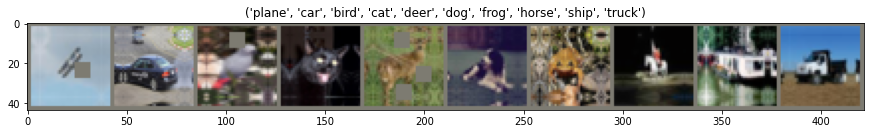

In [6]:
main.show_data(data)

In [7]:
model = main.get_model(True)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 38, 38]           1,728
       BatchNorm2d-2           [-1, 64, 38, 38]             128
              ReLU-3           [-1, 64, 38, 38]               0
            Conv2d-4          [-1, 128, 38, 38]          73,728
         MaxPool2d-5          [-1, 128, 19, 19]               0
       BatchNorm2d-6          [-1, 128, 19, 19]             256
              ReLU-7          [-1, 128, 19, 19]               0
            Conv2d-8          [-1, 128, 19, 19]         147,456
       BatchNorm2d-9          [-1, 128, 19, 19]             256
        Dropout2d-10          [-1, 128, 19, 19]               0
             ReLU-11          [-1, 128, 19, 19]               0
           Conv2d-12          [-1, 128, 19, 19]         147,456
      BatchNorm2d-13          [-1, 128, 19, 19]             256
        Dropout2d-14          [-1, 128,

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.87E+00


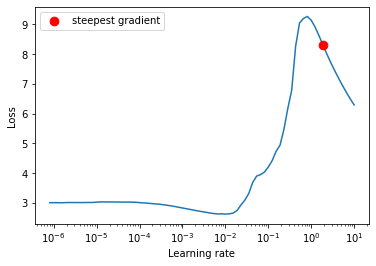

In [8]:
model= main.get_model()
main.get_lr_finder(model, train_loader)

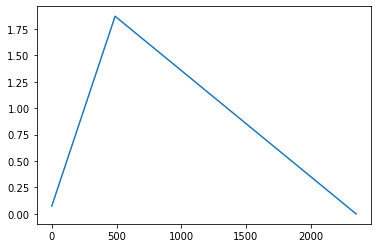

In [9]:
model= main.get_model()
main.get_ocp_plot(train_loader, model, max_lr=1.87) # max lr is considered 10 time suggested lr from lr finder

In [10]:
history = main.run_model(model, train_loader, test_loader, max_lr=2.8e-2)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=1.124269723892212 Batch_id=97 Accuracy=41.65: 100%|██████████| 98/98 [00:24<00:00,  3.95it/s]

length of Average loss 98, length of Average accuracy 98

learning rate 0.0065069938650306755



  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0024, Accuracy: 5609/10000 (56.09%)

EPOCH: 2


Loss=0.9007812738418579 Batch_id=97 Accuracy=63.03: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]

length of Average loss 196, length of Average accuracy 196

learning rate 0.01189398773006135



  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0018, Accuracy: 6837/10000 (68.37%)

EPOCH: 3


Loss=0.6386809349060059 Batch_id=97 Accuracy=72.75: 100%|██████████| 98/98 [00:24<00:00,  3.96it/s]

length of Average loss 294, length of Average accuracy 294

learning rate 0.017280981595092025



  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0017, Accuracy: 7203/10000 (72.03%)

EPOCH: 4


Loss=0.6920806765556335 Batch_id=97 Accuracy=77.97: 100%|██████████| 98/98 [00:24<00:00,  4.01it/s]

length of Average loss 392, length of Average accuracy 392

learning rate 0.0226679754601227



  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0015, Accuracy: 7414/10000 (74.14%)

EPOCH: 5


Loss=0.5120223760604858 Batch_id=97 Accuracy=81.48: 100%|██████████| 98/98 [00:24<00:00,  4.00it/s]

length of Average loss 490, length of Average accuracy 490

learning rate 0.027984962466165414



  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0012, Accuracy: 8061/10000 (80.61%)

EPOCH: 6


Loss=0.45379918813705444 Batch_id=97 Accuracy=84.64: 100%|██████████| 98/98 [00:24<00:00,  4.00it/s]

length of Average loss 588, length of Average accuracy 588

learning rate 0.02651128415037594



  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0011, Accuracy: 8177/10000 (81.77%)

EPOCH: 7


Loss=0.38710370659828186 Batch_id=97 Accuracy=87.62: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]

length of Average loss 686, length of Average accuracy 686

learning rate 0.025037605834586467



  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0010, Accuracy: 8329/10000 (83.29%)

EPOCH: 8


Loss=0.3152286112308502 Batch_id=97 Accuracy=90.55: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]

length of Average loss 784, length of Average accuracy 784

learning rate 0.023563927518796993



  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0011, Accuracy: 8329/10000 (83.29%)

EPOCH: 9


Loss=0.25991806387901306 Batch_id=97 Accuracy=92.23: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]

length of Average loss 882, length of Average accuracy 882

learning rate 0.02209024920300752



  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0010, Accuracy: 8489/10000 (84.89%)

EPOCH: 10


Loss=0.1999562829732895 Batch_id=97 Accuracy=94.02: 100%|██████████| 98/98 [00:24<00:00,  3.94it/s]

length of Average loss 980, length of Average accuracy 980

learning rate 0.020616570887218043



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 77 %
Accuracy of   car : 100 %
Accuracy of  bird : 66 %
Accuracy of   cat : 50 %
Accuracy of  deer : 66 %
Accuracy of   dog : 83 %
Accuracy of  frog : 83 %
Accuracy of horse : 100 %
Accuracy of  ship : 75 %
Accuracy of truck : 77 %

Test set: Average loss: 0.0009, Accuracy: 8546/10000 (85.46%)

EPOCH: 11


Loss=0.10883070528507233 Batch_id=97 Accuracy=95.78: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]

length of Average loss 1078, length of Average accuracy 1078

learning rate 0.019142892571428573



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 80 %
Accuracy of   cat : 75 %
Accuracy of  deer : 80 %
Accuracy of   dog : 87 %
Accuracy of  frog : 88 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 85 %

Test set: Average loss: 0.0009, Accuracy: 8656/10000 (86.56%)

EPOCH: 12


Loss=0.11471174657344818 Batch_id=97 Accuracy=96.54: 100%|██████████| 98/98 [00:24<00:00,  3.97it/s]

length of Average loss 1176, length of Average accuracy 1176

learning rate 0.017669214255639096



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 72 %
Accuracy of   car : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 66 %
Accuracy of  deer : 100 %
Accuracy of   dog : 77 %
Accuracy of  frog : 75 %
Accuracy of horse : 90 %
Accuracy of  ship : 87 %
Accuracy of truck : 72 %

Test set: Average loss: 0.0008, Accuracy: 8725/10000 (87.25%)

EPOCH: 13


Loss=0.077275350689888 Batch_id=97 Accuracy=97.14: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]

length of Average loss 1274, length of Average accuracy 1274

learning rate 0.016195535939849626



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 100 %
Accuracy of  bird : 80 %
Accuracy of   cat : 83 %
Accuracy of  deer : 91 %
Accuracy of   dog : 66 %
Accuracy of  frog : 100 %
Accuracy of horse : 77 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %

Test set: Average loss: 0.0009, Accuracy: 8737/10000 (87.37%)

EPOCH: 14


Loss=0.09123723953962326 Batch_id=97 Accuracy=97.63: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]

length of Average loss 1372, length of Average accuracy 1372

learning rate 0.01472185762406015



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 88 %
Accuracy of  deer : 100 %
Accuracy of   dog : 77 %
Accuracy of  frog : 100 %
Accuracy of horse : 77 %
Accuracy of  ship : 100 %
Accuracy of truck : 88 %

Test set: Average loss: 0.0009, Accuracy: 8749/10000 (87.49%)

EPOCH: 15


Loss=0.0501454621553421 Batch_id=97 Accuracy=98.26: 100%|██████████| 98/98 [00:24<00:00,  4.00it/s]

length of Average loss 1470, length of Average accuracy 1470

learning rate 0.013248179308270677



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 71 %
Accuracy of   cat : 75 %
Accuracy of  deer : 81 %
Accuracy of   dog : 87 %
Accuracy of  frog : 72 %
Accuracy of horse : 80 %
Accuracy of  ship : 88 %
Accuracy of truck : 85 %

Test set: Average loss: 0.0010, Accuracy: 8709/10000 (87.09%)

EPOCH: 16


Loss=0.04412384703755379 Batch_id=97 Accuracy=98.55: 100%|██████████| 98/98 [00:24<00:00,  4.00it/s]

length of Average loss 1568, length of Average accuracy 1568

learning rate 0.011774500992481205



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 84 %
Accuracy of   cat : 71 %
Accuracy of  deer : 71 %
Accuracy of   dog : 50 %
Accuracy of  frog : 80 %
Accuracy of horse : 88 %
Accuracy of  ship : 71 %
Accuracy of truck : 87 %

Test set: Average loss: 0.0009, Accuracy: 8814/10000 (88.14%)

EPOCH: 17


Loss=0.036970995366573334 Batch_id=97 Accuracy=98.85: 100%|██████████| 98/98 [00:24<00:00,  3.95it/s]

length of Average loss 1666, length of Average accuracy 1666

learning rate 0.010300822676691728



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 83 %
Accuracy of   car : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 55 %
Accuracy of  deer : 60 %
Accuracy of   dog : 100 %
Accuracy of  frog : 75 %
Accuracy of horse : 90 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %

Test set: Average loss: 0.0009, Accuracy: 8823/10000 (88.23%)

EPOCH: 18


Loss=0.023475920781493187 Batch_id=97 Accuracy=99.03: 100%|██████████| 98/98 [00:24<00:00,  3.99it/s]

length of Average loss 1764, length of Average accuracy 1764

learning rate 0.008827144360902255



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 100 %
Accuracy of   car : 85 %
Accuracy of  bird : 100 %
Accuracy of   cat : 88 %
Accuracy of  deer : 87 %
Accuracy of   dog : 71 %
Accuracy of  frog : 100 %
Accuracy of horse : 100 %
Accuracy of  ship : 75 %
Accuracy of truck : 70 %

Test set: Average loss: 0.0009, Accuracy: 8883/10000 (88.83%)

EPOCH: 19


Loss=0.02950793132185936 Batch_id=97 Accuracy=99.16: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]

length of Average loss 1862, length of Average accuracy 1862

learning rate 0.007353466045112781



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 100 %
Accuracy of  bird : 87 %
Accuracy of   cat : 75 %
Accuracy of  deer : 71 %
Accuracy of   dog : 83 %
Accuracy of  frog : 80 %
Accuracy of horse : 90 %
Accuracy of  ship : 100 %
Accuracy of truck : 83 %

Test set: Average loss: 0.0009, Accuracy: 8865/10000 (88.65%)

EPOCH: 20


Loss=0.027283187955617905 Batch_id=97 Accuracy=99.30: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]

length of Average loss 1960, length of Average accuracy 1960

learning rate 0.0058797877293233075



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 87 %
Accuracy of   car : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 33 %
Accuracy of  deer : 80 %
Accuracy of   dog : 83 %
Accuracy of  frog : 100 %
Accuracy of horse : 90 %
Accuracy of  ship : 100 %
Accuracy of truck : 77 %

Test set: Average loss: 0.0008, Accuracy: 8912/10000 (89.12%)

EPOCH: 21


Loss=0.015472209081053734 Batch_id=97 Accuracy=99.47: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]

length of Average loss 2058, length of Average accuracy 2058

learning rate 0.004406109413533834



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 100 %
Accuracy of   car : 80 %
Accuracy of  bird : 100 %
Accuracy of   cat : 85 %
Accuracy of  deer : 81 %
Accuracy of   dog : 100 %
Accuracy of  frog : 90 %
Accuracy of horse : 88 %
Accuracy of  ship : 100 %
Accuracy of truck : 76 %

Test set: Average loss: 0.0008, Accuracy: 8913/10000 (89.13%)

EPOCH: 22


Loss=0.02527041919529438 Batch_id=97 Accuracy=99.54: 100%|██████████| 98/98 [00:24<00:00,  3.99it/s]

length of Average loss 2156, length of Average accuracy 2156

learning rate 0.0029324310977443604



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 57 %
Accuracy of   cat : 80 %
Accuracy of  deer : 100 %
Accuracy of   dog : 91 %
Accuracy of  frog : 90 %
Accuracy of horse : 80 %
Accuracy of  ship : 90 %
Accuracy of truck : 88 %

Test set: Average loss: 0.0008, Accuracy: 8931/10000 (89.31%)

EPOCH: 23


Loss=0.02516845054924488 Batch_id=97 Accuracy=99.58: 100%|██████████| 98/98 [00:24<00:00,  4.00it/s]

length of Average loss 2254, length of Average accuracy 2254

learning rate 0.001458752781954887



  0%|          | 0/98 [00:00<?, ?it/s]


Accuracy of plane : 100 %
Accuracy of   car : 80 %
Accuracy of  bird : 71 %
Accuracy of   cat : 90 %
Accuracy of  deer : 100 %
Accuracy of   dog : 87 %
Accuracy of  frog : 100 %
Accuracy of horse : 91 %
Accuracy of  ship : 100 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0008, Accuracy: 8930/10000 (89.30%)

EPOCH: 24


Loss=0.007684226613491774 Batch_id=97 Accuracy=99.65: 100%|██████████| 98/98 [00:24<00:00,  4.03it/s]

length of Average loss 2352, length of Average accuracy 2352

learning rate -1.4925533834583143e-05



Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 83 %
Accuracy of   cat : 70 %
Accuracy of  deer : 87 %
Accuracy of   dog : 77 %
Accuracy of  frog : 87 %
Accuracy of horse : 85 %
Accuracy of  ship : 85 %
Accuracy of truck : 100 %

Test set: Average loss: 0.0008, Accuracy: 8951/10000 (89.51%)



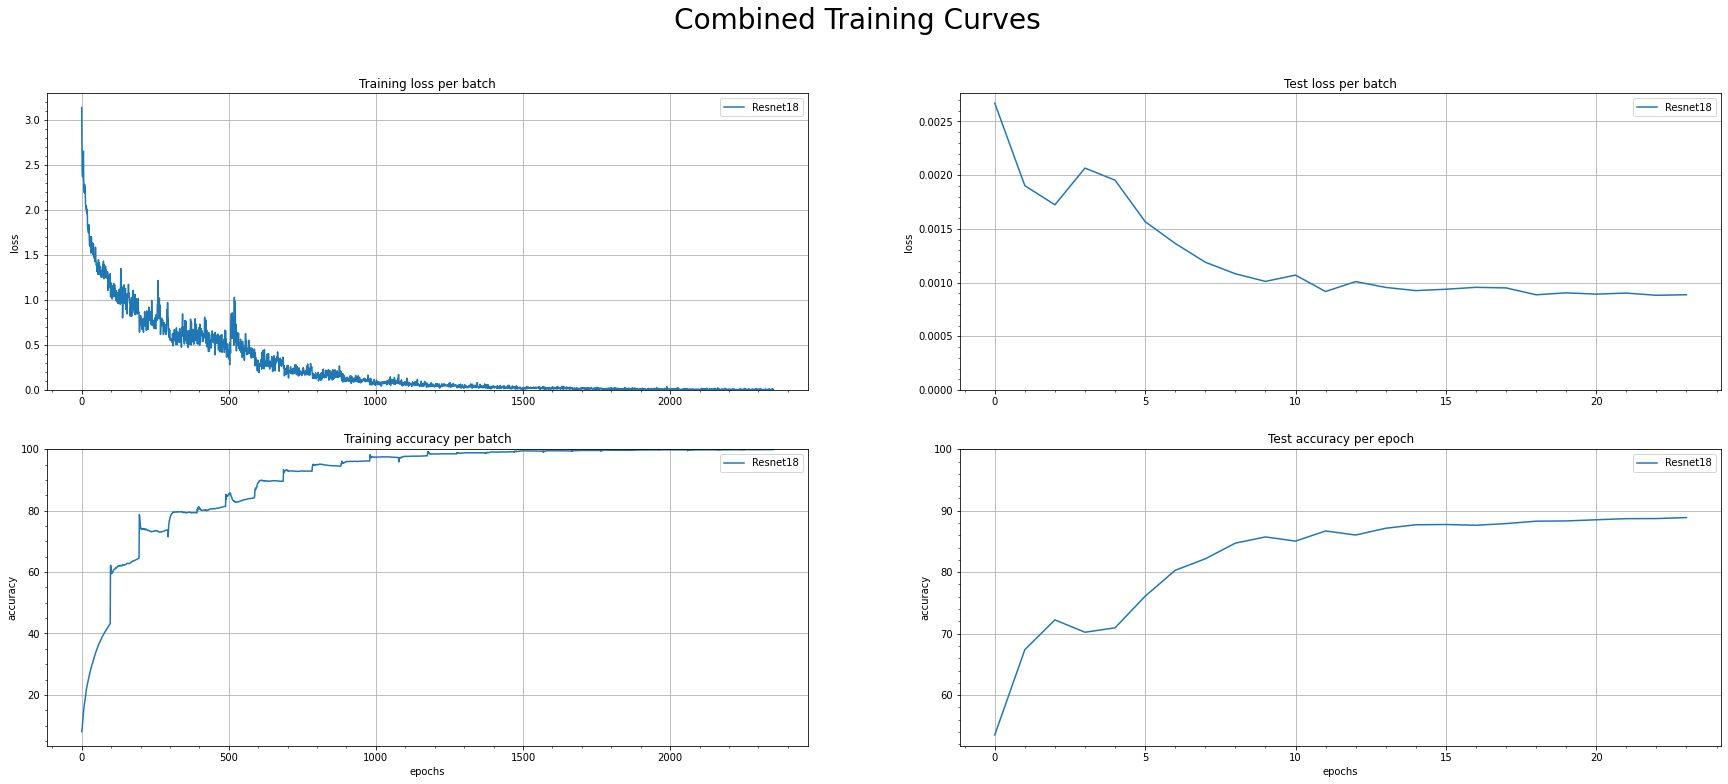

In [ ]:
main.get_training_curves(history)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


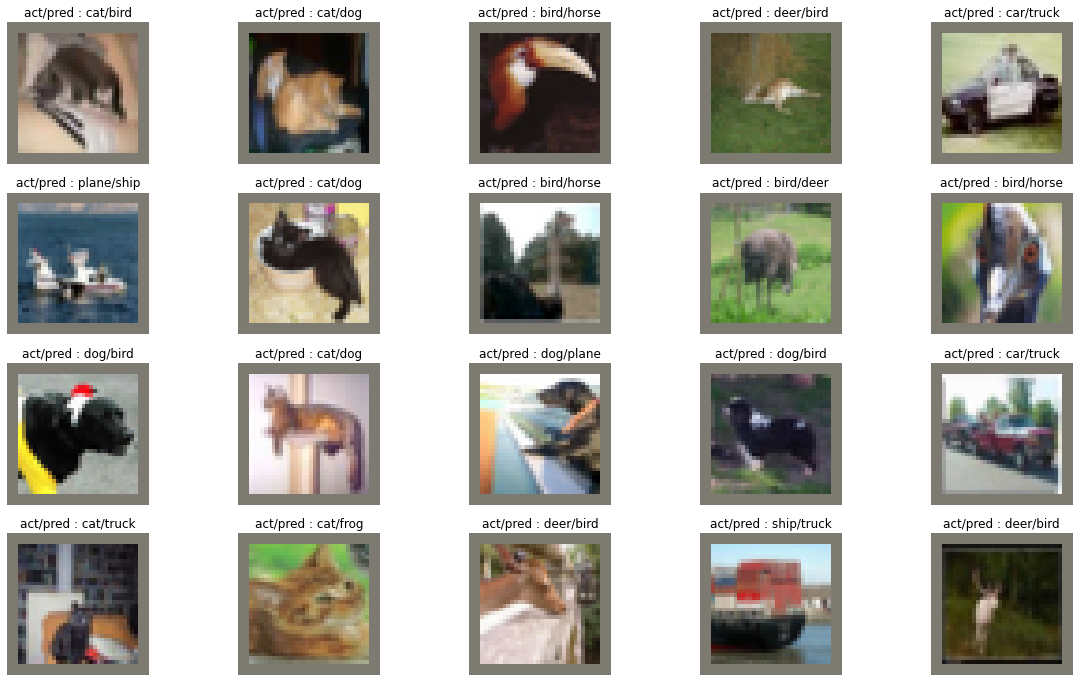

In [ ]:
main.get_show_misclassified(model, test_loader, num_of_images=20)